In [301]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [302]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [303]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [304]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [305]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [306]:
# Out of 81 features we need to focus on those features which have a great impact on the sales price

In [307]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [308]:
numerical_cols = train.select_dtypes(include=[np.number])
numerical_cols.columns
#print(numerical_cols.shape)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [309]:
train.describe(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [310]:
categorical_cols = train.select_dtypes(include=[np.object])
categorical_cols.columns
#print(categorical_cols.shape)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [311]:
train.describe(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


S:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


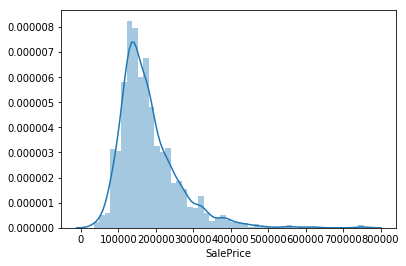

In [312]:
sns.distplot(train['SalePrice'],kde=True)
#The mean of the saleprice of the house lies between 1-2 lakhs

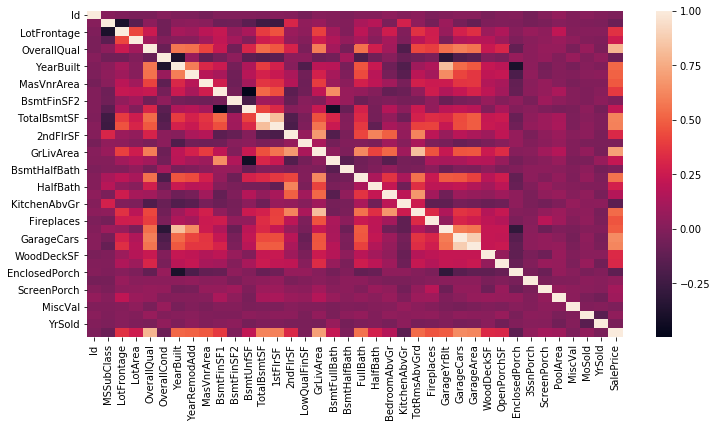

In [313]:
plt.figure(figsize=(12,6))
corr = train.corr()
sns.heatmap(corr)

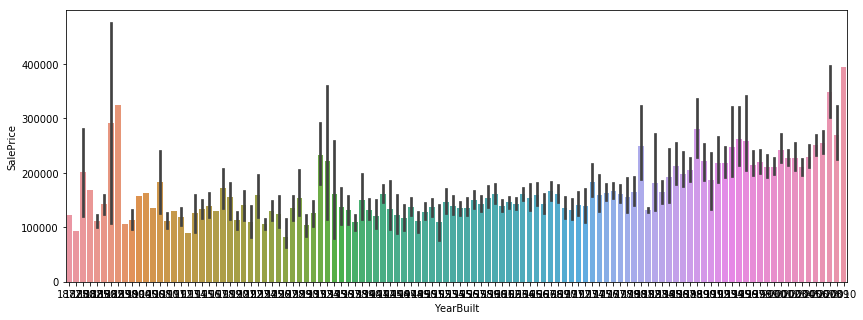

In [314]:
plt.figure(figsize=(14,5))
sns.barplot(x='YearBuilt',y='SalePrice',data=train)
#Its quite inferable that the mean sale price is realtively higher for the recently built houses

In [315]:
# Columns with null values
null_val_cols = list(train.columns[train.isnull().any()])
null_test_cols = list(test.columns[test.isnull().any()])

In [316]:
#Visualising the percent of missing values in the dataset
percent=[]
def percent_null(null_cols):
    for col in null_cols:
        percent.append(train[col].isnull().sum() * 100 / len(train))
    return percent
percentage = percent_null(null_val_cols)

In [317]:
for i in range(len(null_val_cols)):
    print(null_val_cols[i] + ": " + str(percentage[i]))

LotFrontage: 17.73972602739726
Alley: 93.76712328767124
MasVnrType: 0.547945205479452
MasVnrArea: 0.547945205479452
BsmtQual: 2.5342465753424657
BsmtCond: 2.5342465753424657
BsmtExposure: 2.6027397260273974
BsmtFinType1: 2.5342465753424657
BsmtFinType2: 2.6027397260273974
Electrical: 0.0684931506849315
FireplaceQu: 47.26027397260274
GarageType: 5.5479452054794525
GarageYrBlt: 5.5479452054794525
GarageFinish: 5.5479452054794525
GarageQual: 5.5479452054794525
GarageCond: 5.5479452054794525
PoolQC: 99.52054794520548
Fence: 80.75342465753425
MiscFeature: 96.3013698630137


In [318]:
percent_test = percent_null(null_test_cols)
for i in range(len(null_test_cols)):
    print(null_test_cols[i] + ": " + str(percent_test[i]))

MSZoning: 17.73972602739726
LotFrontage: 93.76712328767124
Alley: 0.547945205479452
Utilities: 0.547945205479452
Exterior1st: 2.5342465753424657
Exterior2nd: 2.5342465753424657
MasVnrType: 2.6027397260273974
MasVnrArea: 2.5342465753424657
BsmtQual: 2.6027397260273974
BsmtCond: 0.0684931506849315
BsmtExposure: 47.26027397260274
BsmtFinType1: 5.5479452054794525
BsmtFinSF1: 5.5479452054794525
BsmtFinType2: 5.5479452054794525
BsmtFinSF2: 5.5479452054794525
BsmtUnfSF: 5.5479452054794525
TotalBsmtSF: 99.52054794520548
BsmtFullBath: 80.75342465753425
BsmtHalfBath: 96.3013698630137
KitchenQual: 0.0
Functional: 17.73972602739726
FireplaceQu: 93.76712328767124
GarageType: 0.0
GarageYrBlt: 0.0
GarageFinish: 0.0
GarageCars: 0.547945205479452
GarageArea: 0.547945205479452
GarageQual: 2.5342465753424657
GarageCond: 2.5342465753424657
PoolQC: 2.6027397260273974
Fence: 2.5342465753424657
MiscFeature: 0.0
SaleType: 2.6027397260273974


S:\New folder\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

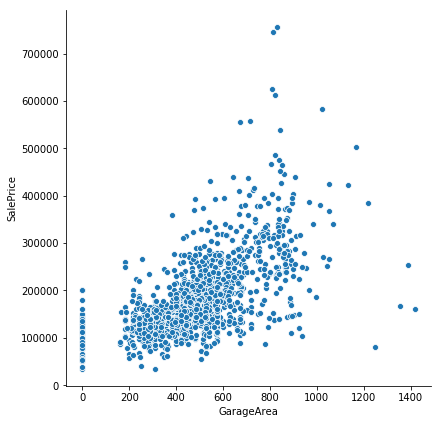

In [320]:
# Taking a look at the important featues
plt.figure(figsize=(12,6))
sns.pairplot(data=train, x_vars=['GarageArea'], y_vars=['SalePrice'],size=6)
# This gives us a idea that in our dataset most instances have a garage area between 400-600
# which is understood because most middle class people would prefer medium sized garages

S:\New folder\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


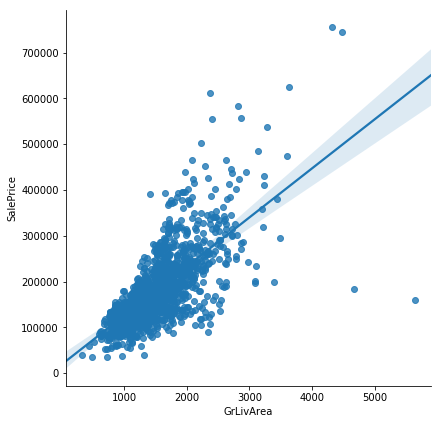

In [321]:
sns.pairplot(data=train, x_vars=['GrLivArea'], y_vars=['SalePrice'],size=6,kind='reg')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

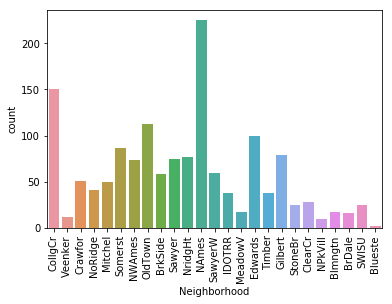

In [322]:
sns.countplot(x='Neighborhood',data=train)
plt.xticks(rotation='vertical')

In [323]:
# Dropping the features with more than 80% of missing data
train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [324]:
# For numerical columns with missing values
train['LotFrontage'].fillna(0,inplace=True)
test['LotFrontage'].fillna(0,inplace=True)
test['GarageCars'].fillna(0,inplace=True)
test['GarageArea'].fillna(0,inplace=True)

In [325]:
train['MasVnrArea'].fillna(train['MasVnrArea'].median(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(),inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(),inplace=True)
t_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']
for col in t_cols:
    test[col].fillna(test[col].median(),inplace=True)

In [326]:
# For categorical columns with missing values
train['MasVnrType'].fillna('Others',inplace=True)
train['Electrical'].fillna('Others',inplace=True)
test['MasVnrType'].fillna('Others',inplace=True)

In [327]:
left_cols = ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','GarageType',
             'GarageFinish','GarageQual','GarageCond','FireplaceQu']   
for each_col in left_cols:
    train[each_col].fillna("None",inplace=True)
    test[each_col].fillna("None",inplace=True)

# For test data
left_test_cols = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional']
for each_col in left_test_cols:
    test[each_col].fillna("None",inplace=True)

In [328]:
# Encoding the categorical columns for the model to learn easily
from sklearn.preprocessing import LabelEncoder
cols = ('MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive','SaleType', 'SaleCondition')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [329]:
from sklearn.model_selection import train_test_split
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=101)

In [330]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [331]:
predictions = model.predict(X_test)

In [332]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

16278.27062869955
553559665.6399187
23527.848725285505


In [333]:
from sklearn import metrics
print('Variance score: %.2f' % model.score(X_test, y_test))

Variance score: 0.89


In [334]:
# Training the model on the whole dataset
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [335]:
preds = model.predict(test)

In [336]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': preds})
my_submission.to_csv('submission.csv', index=False)

In [337]:
#End